docker run -p 8888:8888 my-midas-project


In [31]:
# %matplotlib inline
# 1.5.3 pandas
import datetime


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from midas.mix import mix_freq, mix_freq2
from midas.adl import estimate, forecast, midas_adl, rmse, estimate2,forecast2, midas_adl2
print(pd.__version__)


1.5.3


In [32]:
weekly_sales = pd.read_csv('./testData/2023/df_vacum_grouped_weekly.csv', index_col=0, parse_dates=True)
google_trends = pd.read_csv('./testData/2023/multiTimeline.csv')

In [33]:
weekly_sales.columns = ['Total_Amount']  # or any name you like

# Reset index to bring 'week_group' (currently index) back as a column
weekly_sales = weekly_sales.reset_index()

# Rename 'week_group' to 'Week_Start_Date' or any name you want
weekly_sales = weekly_sales.rename(columns={'week_group': 'Week_Start_Date'})

print(weekly_sales.columns)
google_trends = google_trends.rename(columns={'Week': 'date'})
print(google_trends.columns)
weekly_sales['date'] = weekly_sales['date'].astype(str)
google_trends['date'] = google_trends['date'].astype(str)


Index(['date', 'Total_Amount'], dtype='object')
Index(['date', 'เครื่องดูดฝุ่น: (Thailand)', 'Hitachi: (Thailand)'], dtype='object')


In [34]:
merge = pd.merge(google_trends, weekly_sales, on='date', how='inner')

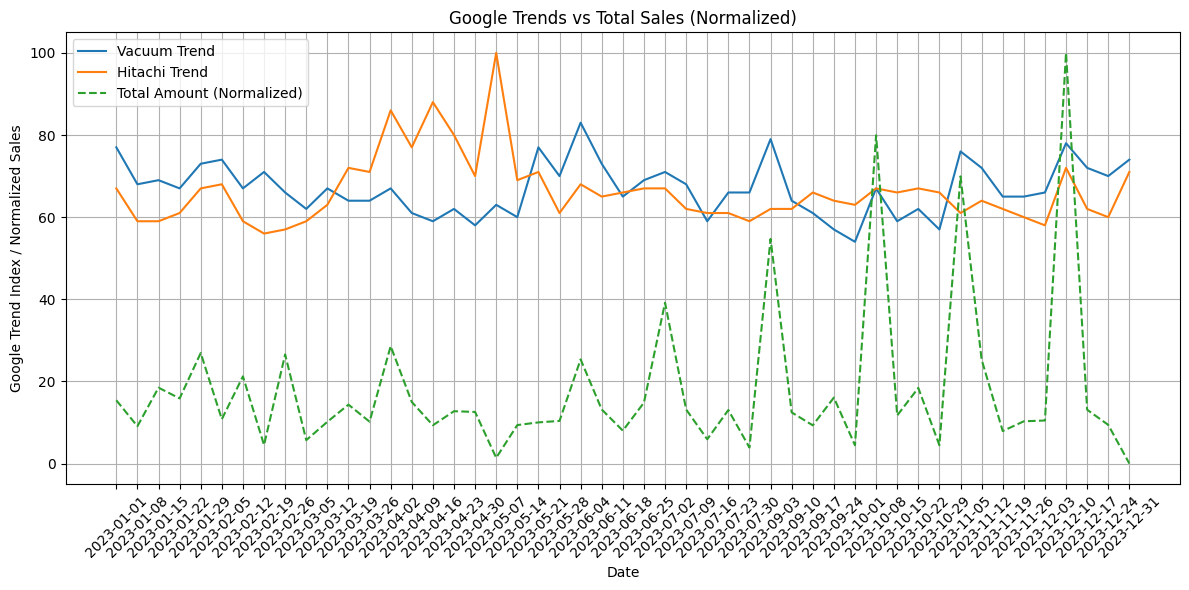

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Example DataFrame
# df contains: ['date', 'เครื่องดูดฝุ่น: (Thailand)', 'Hitachi: (Thailand)', 'Total_Amount']

# Normalize 'Total_Amount' to the same 0-100 scale as Google Trend data
scaler = MinMaxScaler(feature_range=(0, 100))

merge['Total_Amount_Normalized'] = scaler.fit_transform(merge[['Total_Amount']])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(merge['date'], merge['เครื่องดูดฝุ่น: (Thailand)'], label='Vacuum Trend')
plt.plot(merge['date'], merge['Hitachi: (Thailand)'], label='Hitachi Trend')
plt.plot(merge['date'], merge['Total_Amount_Normalized'], label='Total Amount (Normalized)', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Google Trend Index / Normalized Sales')
plt.title('Google Trends vs Total Sales (Normalized)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [38]:
print("hitachi:", merge['Total_Amount'].corr(merge['Hitachi: (Thailand)']))
print("vacuum:", merge['Total_Amount'].corr(merge['เครื่องดูดฝุ่น: (Thailand)']))

hitachi: 0.0014434540317085456
vacuum: 0.4396048930864714
